So far I have not included shot noise in the bispectrum calculations. Lets add in the shot noise correction 
$$B_{SN} = \frac{1}{\bar{n}} (P(k_1) + P(k_2) + P(k_3)) + \frac{1}{\bar{n}^2}$$

In [1]:
import h5py
import numpy as np 
from emanu import util as UT
from emanu import obvs as Obvs

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
kf = (2*np.pi)/1000.

In [9]:
def Nhalo(mneut, i, nzbin): 
    fhalo = ''.join([UT.dat_dir(), 'halos/', 
                    'groups.', str(mneut), 'eV.', str(i), '.nzbin', str(nzbin), '.mhmin3200.0.hdf5'])
    f = h5py.File(fhalo, 'r')
    return f['Mass'].value.size

In [6]:
def readB123(mneut, i, nzbin, zspace=True): 
    bk_kwargs = {'Lbox': 1000., 'zspace': zspace, 'mh_min': 3200., 'Ngrid': 360, 'Nmax': 40, 'Ncut': 3, 'step': 3}
    i_k, j_k, l_k, B123, Q123, cnts, k_f = Obvs.B123_halo(mneut, i, nzbin, **bk_kwargs)
    return i_k, j_k, l_k, (2*np.pi)**6 * B123 / kf**6, cnts

In [41]:
def readPlk(mneut, i, nzbin, zspace=True): 
    pk_kwargs = {'zspace': zspace, 'mh_min': 3200., 'Ngrid': 360}
    #plk_i = Obvs.Plk_halo(mneut, i, nzbin, **pk_kwargs)
    fplk = ''.join([UT.dat_dir(), 'plk/plk.groups.', str(mneut), 'eV.', str(i), '.nzbin', str(nzbin), '.zspace.mhmin3200.0.Nmesh360.Nbin120.dat'])
    k, p0k = np.loadtxt(fplk, skiprows=2, unpack=True, usecols=[0,1])
    return k, p0k

In [42]:
i, j, l, B123, cnts = readB123(0.0, 1, 4)
k, p0k = readPlk(0.0, 1, 4)

In [43]:
N_halo = Nhalo(0.0, 1, 4)
n_halo = float(N_halo)/1000.**3
p0ki = np.interp(i * kf, k, p0k)
p0kj = np.interp(j * kf, k, p0k)
p0kl = np.interp(l * kf, k, p0k)

In [45]:
print('Number density = %f' % n_halo)

Number density = 0.000156


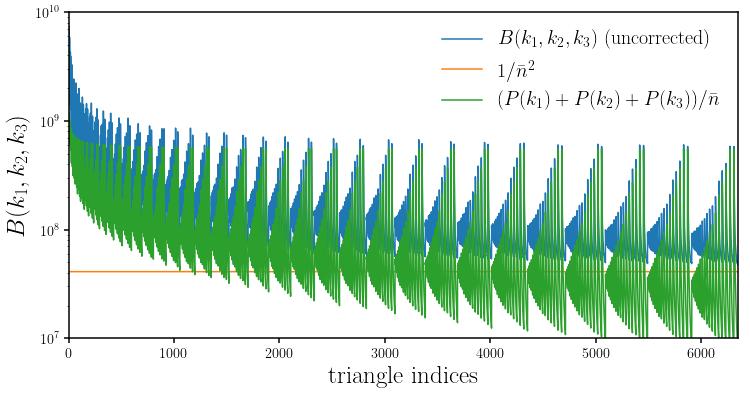

In [56]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(111)
sub.plot(range(len(B123)), B123, label=r'$B(k_1, k_2, k_3)$ (uncorrected)')
sub.plot(range(len(B123)), np.repeat((1./n_halo)**2, len(B123)), label=r'$1/\bar{n}^2$')
sub.plot(range(len(B123)), (p0ki + p0kj + p0kl)/n_halo, label=r'$(P(k_1)+P(k_2)+P(k_3))/\bar{n}$')
sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel('triangle indices', fontsize=25)
sub.set_xlim([0., len(B123)])
sub.set_ylabel("$B(k_1, k_2, k_3)$", fontsize=25)
sub.set_ylim([1e7, 1e10])
sub.set_yscale('log')

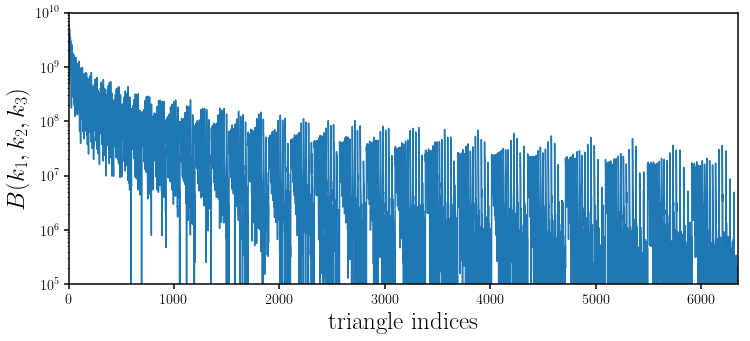

In [59]:
fig = plt.figure(figsize=(12,5))
sub = fig.add_subplot(111)
sub.plot(range(len(B123)), B123 - np.repeat((1./n_halo)**2, len(B123)) - (p0ki + p0kj + p0kl)/n_halo)
sub.set_xlabel('triangle indices', fontsize=25)
sub.set_xlim([0., len(B123)])
sub.set_ylabel("$B(k_1, k_2, k_3)$", fontsize=25)
sub.set_ylim([1e5, 1e10])
sub.set_yscale('log')